In [13]:
library(ArchR)
library(Seurat)
library(dplyr)
library(tidyr)
library(parallel)
library(BSgenome.Mmusculus.UCSC.mm10)
library(monocle3)
library(cicero)

Loading required package: SingleCellExperiment


Attaching package: ‘monocle3’


The following objects are masked from ‘package:Biobase’:

    exprs, fData, fData<-, pData, pData<-


Loading required package: Gviz



In [2]:
projdir <- '/nas/homes/benyang/HiC/13_MultiOme/ArchR_analysis'

addArchRGenome("mm10")
addArchRThreads(threads = 45) 

Setting default genome to Mm10.

Setting default number of Parallel threads to 45.



In [55]:
source(file.path(projdir, 'ArchR_utilities.R'))

In [4]:
young_MuSC_projAging1 <- readRDS(file.path(projdir, "MuSC_subset", "young_MuSC", "Save-ArchR-Project.rds"))
aged_MuSC_projAging1 <- readRDS(file.path(projdir, "MuSC_subset", "aged_MuSC", "Save-ArchR-Project.rds"))

In [14]:
MuSC_projAging1 <- readRDS(file.path(projdir, "MuSC_subset", "all_MuSCs", "Save-ArchR-Project.rds"))

# Dimension reduction

In [5]:
young_MuSC_projAging1 <- addIterativeLSI(
    ArchRProj = young_MuSC_projAging1,
    useMatrix = "TileMatrix", 
    name = "IterativeLSI", 
    iterations = 2, 
    clusterParams = list( #See Seurat::FindClusters
        resolution = c(0.2), 
        sampleCells = 10000, 
        n.start = 10
    ), 
    varFeatures = 25000, 
    dimsToUse = 1:30,
    force = T
)

Checking Inputs...

ArchR logging to : ArchRLogs/ArchR-addIterativeLSI-6ac05e5529f9-Date-2022-12-23_Time-18-35-29.log
If there is an issue, please report to github with logFile!

2022-12-23 18:35:31 : Computing Total Across All Features, 0.022 mins elapsed.

2022-12-23 18:35:37 : Computing Top Features, 0.122 mins elapsed.

###########
2022-12-23 18:35:38 : Running LSI (1 of 2) on Top Features, 0.145 mins elapsed.
###########

2022-12-23 18:35:38 : Creating Partial Matrix, 0.146 mins elapsed.

2022-12-23 18:35:41 : Computing LSI, 0.193 mins elapsed.

2022-12-23 18:35:49 : Identifying Clusters, 0.328 mins elapsed.

2022-12-23 18:35:50 : Identified 2 Clusters, 0.35 mins elapsed.

2022-12-23 18:35:50 : Saving LSI Iteration, 0.351 mins elapsed.

2022-12-23 18:36:01 : Creating Cluster Matrix on the total Group Features, 0.532 mins elapsed.

2022-12-23 18:36:08 : Computing Variable Features, 0.636 mins elapsed.

###########
2022-12-23 18:36:08 : Running LSI (2 of 2) on Variable Features, 0.6

In [6]:
aged_MuSC_projAging1 <- addIterativeLSI(
    ArchRProj = aged_MuSC_projAging1,
    useMatrix = "TileMatrix", 
    name = "IterativeLSI", 
    iterations = 2, 
    clusterParams = list( #See Seurat::FindClusters
        resolution = c(0.2), 
        sampleCells = 10000, 
        n.start = 10
    ), 
    varFeatures = 25000, 
    dimsToUse = 1:30,
    force = T
)

Checking Inputs...

ArchR logging to : ArchRLogs/ArchR-addIterativeLSI-6ac0797e667c-Date-2022-12-23_Time-18-36-18.log
If there is an issue, please report to github with logFile!

2022-12-23 18:36:20 : Computing Total Across All Features, 0.023 mins elapsed.

2022-12-23 18:36:23 : Computing Top Features, 0.076 mins elapsed.

###########
2022-12-23 18:36:25 : Running LSI (1 of 2) on Top Features, 0.106 mins elapsed.
###########

2022-12-23 18:36:25 : Creating Partial Matrix, 0.107 mins elapsed.

2022-12-23 18:36:30 : Computing LSI, 0.178 mins elapsed.

2022-12-23 18:36:39 : Identifying Clusters, 0.336 mins elapsed.

2022-12-23 18:36:40 : Identified 3 Clusters, 0.352 mins elapsed.

2022-12-23 18:36:40 : Saving LSI Iteration, 0.352 mins elapsed.

2022-12-23 18:36:51 : Creating Cluster Matrix on the total Group Features, 0.536 mins elapsed.

2022-12-23 18:36:58 : Computing Variable Features, 0.657 mins elapsed.

###########
2022-12-23 18:36:58 : Running LSI (2 of 2) on Variable Features, 0.

# Add UMAP

In [7]:
young_MuSC_projAging1 <- addUMAP(
    ArchRProj = young_MuSC_projAging1, 
    reducedDims = "IterativeLSI", 
    name = "UMAP", 
    nNeighbors = 30, 
    minDist = 0.5, 
    metric = "cosine",
    force = T
)

18:37:12 UMAP embedding parameters a = 0.583 b = 1.334

18:37:12 Read 540 rows and found 30 numeric columns

18:37:12 Using Annoy for neighbor search, n_neighbors = 30

18:37:12 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:37:12 Writing NN index file to temp file /tmp/RtmpuMgnuA/file6ac07486d65f

18:37:12 Searching Annoy index using 32 threads, search_k = 3000

18:37:12 Annoy recall = 100%

18:37:13 Commencing smooth kNN distance calibration using 32 threads
 with target n_neighbors = 30

18:37:14 Initializing from normalized Laplacian + noise (using irlba)

18:37:14 Commencing optimization for 500 epochs, with 23992 positive edges

18:37:15 Optimization finished

18:37:15 Creating temp model dir /tmp/RtmpuMgnuA/dir6ac02b602720

18:37:15 Creating dir /tmp/RtmpuMg

In [8]:
aged_MuSC_projAging1 <- addUMAP(
    ArchRProj = aged_MuSC_projAging1, 
    reducedDims = "IterativeLSI", 
    name = "UMAP", 
    nNeighbors = 30, 
    minDist = 0.5, 
    metric = "cosine",
    force = T
)

Filtering 1 dims correlated > 0.75 to log10(depth + 1)

18:37:16 UMAP embedding parameters a = 0.583 b = 1.334

18:37:16 Read 457 rows and found 29 numeric columns

18:37:16 Using Annoy for neighbor search, n_neighbors = 30

18:37:16 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:37:16 Writing NN index file to temp file /tmp/RtmpuMgnuA/file6ac01a6ce7ed

18:37:16 Searching Annoy index using 32 threads, search_k = 3000

18:37:16 Annoy recall = 100%

18:37:17 Commencing smooth kNN distance calibration using 32 threads
 with target n_neighbors = 30

18:37:17 Initializing from normalized Laplacian + noise (using irlba)

18:37:17 Commencing optimization for 500 epochs, with 20298 positive edges

18:37:19 Optimization finished

18:37:19 Creating temp model dir /tmp/RtmpuM

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-6ac04fb54b32-Date-2022-12-23_Time-18-37-19.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-6ac04fb54b32-Date-2022-12-23_Time-18-37-19.log



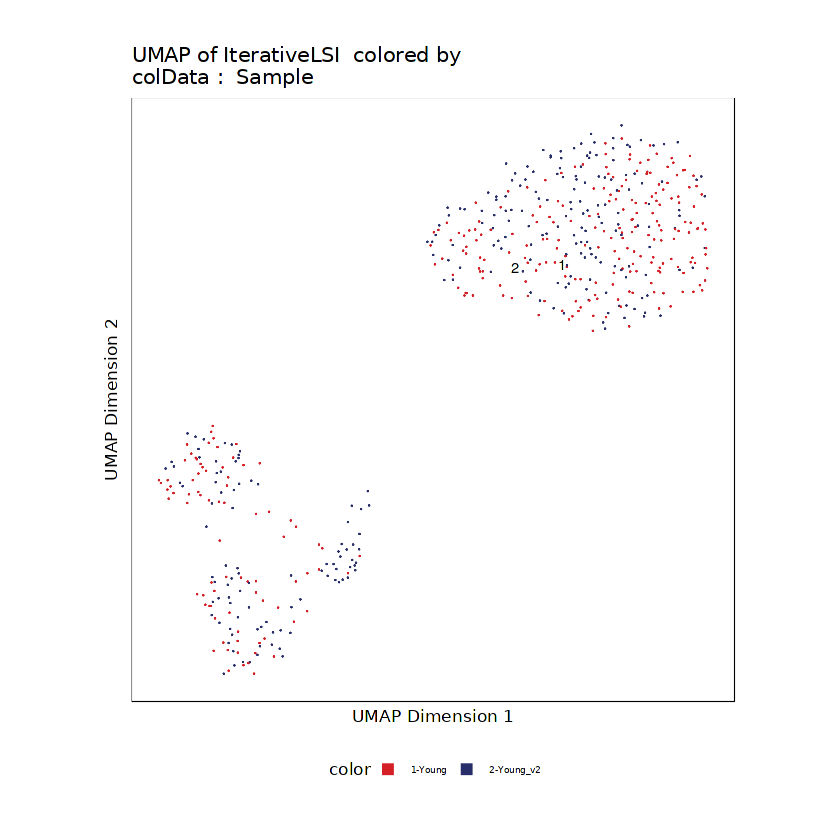

In [9]:
plotEmbedding(young_MuSC_projAging1)

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-6ac040d40c1c-Date-2022-12-23_Time-18-43-05.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-6ac040d40c1c-Date-2022-12-23_Time-18-43-05.log



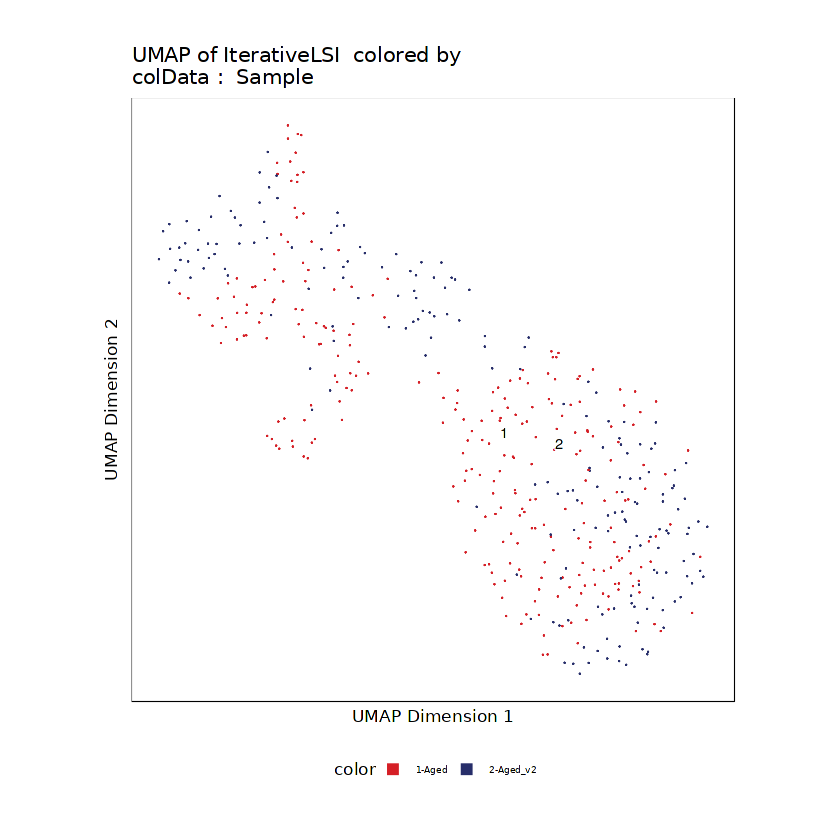

In [10]:
plotEmbedding(aged_MuSC_projAging1)

# Group Coverages

In [11]:
young_MuSC_projAging1 <- addGroupCoverages(young_MuSC_projAging1, groupBy="Age", minCells = 40, maxCells=500, minReplicates = 3, maxReplicates=6, force = TRUE)
aged_MuSC_projAging1 <- addGroupCoverages(aged_MuSC_projAging1, groupBy="Age", minCells = 40, maxCells=500, minReplicates = 3, maxReplicates=6, force = TRUE)

ArchR logging to : ArchRLogs/ArchR-addGroupCoverages-6ac05a7ea433-Date-2022-12-23_Time-18-43-55.log
If there is an issue, please report to github with logFile!

Young (1 of 1) : CellGroups N = 3

2022-12-23 18:43:56 : Creating Coverage Files!, 0.027 mins elapsed.

2022-12-23 18:43:56 : Batch Execution w/ safelapply!, 0.027 mins elapsed.

2022-12-23 18:44:43 : Adding Kmer Bias to Coverage Files!, 0.812 mins elapsed.

Completed Kmer Bias Calculation

Adding Kmer Bias (1 of 3)

Adding Kmer Bias (2 of 3)

Adding Kmer Bias (3 of 3)

2022-12-23 18:44:54 : Finished Creation of Coverage Files!, 0.989 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-addGroupCoverages-6ac05a7ea433-Date-2022-12-23_Time-18-43-55.log

ArchR logging to : ArchRLogs/ArchR-addGroupCoverages-6ac05877ac9f-Date-2022-12-23_Time-18-44-54.log
If there is an issue, please report to github with logFile!

Aged (1 of 1) : CellGroups N = 3

2022-12-23 18:44:56 : Creating Coverage Files!, 0.027 mins elapsed.

2022-12-2

# Save objects

In [12]:
saveArchRProject(ArchRProj = young_MuSC_projAging1, outputDirectory = file.path(projdir,"MuSC_subset","young_MuSC"), overwrite = TRUE, load = FALSE)
saveArchRProject(ArchRProj = aged_MuSC_projAging1, outputDirectory = file.path(projdir,"MuSC_subset","young_MuSC"), overwrite = TRUE, load = FALSE)

Copying ArchRProject to new outputDirectory : /nas/homes/benyang/HiC/13_MultiOme/ArchR_analysis/MuSC_subset/young_MuSC

Getting ImputeWeights

No imputeWeights found, returning NULL

Copying Other Files...

Copying Other Files (1 of 26): Aged

Copying Other Files (2 of 26): Aged_v2

Copying Other Files (3 of 26): celltype_markersGS.RDS

Copying Other Files (4 of 26): Embeddings

Copying Other Files (5 of 26): GroupCoverages

Copying Other Files (6 of 26): Harmony_4iter_Clusters_res0.2_cluster_markersGS.RDS

Copying Other Files (7 of 26): Harmony_Age_Clusters_res0.3_cluster_markersGS.RDS

Copying Other Files (8 of 26): IterativeLSI

Copying Other Files (9 of 26): IterativeLSI_4iter

Copying Other Files (10 of 26): IterativeLSI_4iter_10kvar

Copying Other Files (11 of 26): New_Harmony_4iter_Clusters_res0.2_cluster_markersGS.RDS

Copying Other Files (12 of 26): Peak2GeneLinks

Copying Other Files (13 of 26): PeakCalls

Copying Other Files (14 of 26): Plots

Copying Other Files (15 of 26):

# Prepare for Cicero

## Make cell data set objects from MuSCs

In [15]:
young_peakmatrix <- getMatrixFromProject(young_MuSC_projAging1, "PeakMatrix")
aged_peakmatrix <- getMatrixFromProject(aged_MuSC_projAging1, "PeakMatrix")
MuSC_peakmatrix <- getMatrixFromProject(MuSC_projAging1, "PeakMatrix")

ArchR logging to : ArchRLogs/ArchR-getMatrixFromProject-6ac06d6dbe30-Date-2022-12-23_Time-18-51-16.log
If there is an issue, please report to github with logFile!

2022-12-23 18:51:22 : Organizing colData, 0.101 mins elapsed.

2022-12-23 18:51:23 : Organizing rowData, 0.103 mins elapsed.

2022-12-23 18:51:23 : Organizing rowRanges, 0.103 mins elapsed.

2022-12-23 18:51:23 : Organizing Assays (1 of 1), 0.104 mins elapsed.

2022-12-23 18:51:23 : Constructing SummarizedExperiment, 0.105 mins elapsed.

2022-12-23 18:51:25 : Finished Matrix Creation, 0.141 mins elapsed.

ArchR logging to : ArchRLogs/ArchR-getMatrixFromProject-6ac01d44a46b-Date-2022-12-23_Time-18-51-25.log
If there is an issue, please report to github with logFile!

2022-12-23 18:51:31 : Organizing colData, 0.103 mins elapsed.

2022-12-23 18:51:31 : Organizing rowData, 0.105 mins elapsed.

2022-12-23 18:51:31 : Organizing rowRanges, 0.105 mins elapsed.

2022-12-23 18:51:31 : Organizing Assays (1 of 1), 0.105 mins elapsed.

2

In [17]:
young_peakmatrix_sparse <- make_sparse_peakmatrix(young_peakmatrix)
aged_peakmatrix_sparse <- make_sparse_peakmatrix(aged_peakmatrix)
MuSC_peakmatrix_sparse <- make_sparse_peakmatrix(MuSC_peakmatrix)

In [18]:
young_atac_cds <- make_atac_cds(young_peakmatrix_sparse[ ,c("range_string","cell","x")], binarize=TRUE)
aged_atac_cds <- make_atac_cds(aged_peakmatrix_sparse[ ,c("range_string","cell","x")], binarize=TRUE)
MuSC_atac_cds <- make_atac_cds(MuSC_peakmatrix_sparse[ ,c("range_string","cell","x")], binarize=TRUE)

In [23]:
set.seed(2022)
young_atac_cds <- prepare_for_cicero(young_atac_cds, young_MuSC_projAging1, "UMAP")
aged_atac_cds <- prepare_for_cicero(aged_atac_cds, aged_MuSC_projAging1, "UMAP")
MuSC_atac_cds <- prepare_for_cicero(MuSC_atac_cds, MuSC_projAging1, "UMAP")

Warning message in .check_reddim_names(x, value[[v]], withDimnames = TRUE, vname = sprintf("value[[%s]]", :
"non-NULL 'rownames(value[[1]])' should be the same as 'colnames(x)' for
'reducedDims<-'. This will be an error in the next release of
Bioconductor."
Warning message in .check_reddim_names(x, value[[v]], withDimnames = TRUE, vname = sprintf("value[[%s]]", :
"non-NULL 'rownames(value[[1]])' should be the same as 'colnames(x)' for
'reducedDims<-'. This will be an error in the next release of
Bioconductor."
Warning message in .check_reddim_names(x, value[[v]], withDimnames = TRUE, vname = sprintf("value[[%s]]", :
"non-NULL 'rownames(value[[1]])' should be the same as 'colnames(x)' for
'reducedDims<-'. This will be an error in the next release of
Bioconductor."


## Look at effects of varying k parameters (# cells to aggregate per bin)

### Create lists of cds objects

In [50]:
pData(young_atac_cds)

DataFrame with 540 rows and 3 columns
                                             cells Size_Factor
                                       <character>   <numeric>
Young_v2#AAAGGCTCAGTTATGT-1 Young_v2#AAAGGCTCAGT..    1.246445
Young_v2#AACAAGCCAGCTTAGC-1 Young_v2#AACAAGCCAGC..    0.901031
Young_v2#AACAGCAAGGGTTATC-1 Young_v2#AACAGCAAGGG..    0.828774
Young_v2#AACTCACAGGTTACGT-1 Young_v2#AACTCACAGGT..    0.706155
Young_v2#AAGACCAAGCATGTCG-1 Young_v2#AAGACCAAGCA..    1.586932
...                                            ...         ...
Young#TTTCCACCACCTCAGG-1    Young#TTTCCACCACCTCA..    3.188644
Young#TTTGGTGCAATAATGG-1    Young#TTTGGTGCAATAAT..    0.630613
Young#TTTGTCCCAGCAACAG-1    Young#TTTGTCCCAGCAAC..    1.041168
Young#TTTGTCCCAGGGAGGA-1    Young#TTTGTCCCAGGGAG..    0.786623
Young#TTTGTGAAGGAGTCGG-1    Young#TTTGTGAAGGAGTC..    1.748965
                            num_genes_expressed
                                      <integer>
Young_v2#AAAGGCTCAGTTATGT-1                2277

Overlap QC metrics:
Cells per bin: 10
Maximum shared cells bin-bin: 8
Mean shared cells bin-bin: 0.174063835134456
Median shared cells bin-bin: 0

Overlap QC metrics:
Cells per bin: 15
Maximum shared cells bin-bin: 13
Mean shared cells bin-bin: 0.413798181842525
Median shared cells bin-bin: 0

Overlap QC metrics:
Cells per bin: 20
Maximum shared cells bin-bin: 17
Mean shared cells bin-bin: 0.771960132890365
Median shared cells bin-bin: 0

Overlap QC metrics:
Cells per bin: 25
Maximum shared cells bin-bin: 22
Mean shared cells bin-bin: 1.24337805297558
Median shared cells bin-bin: 0

Overlap QC metrics:
Cells per bin: 30
Maximum shared cells bin-bin: 26
Mean shared cells bin-bin: 1.86426567731427
Median shared cells bin-bin: 0

Overlap QC metrics:
Cells per bin: 35
Maximum shared cells bin-bin: 31
Mean shared cells bin-bin: 2.58765077369729
Median shared cells bin-bin: 0

Overlap QC metrics:
Cells per bin: 40
Maximum shared cells bin-bin: 35
Mean shared cells bin-bin: 3.50706287683032
M

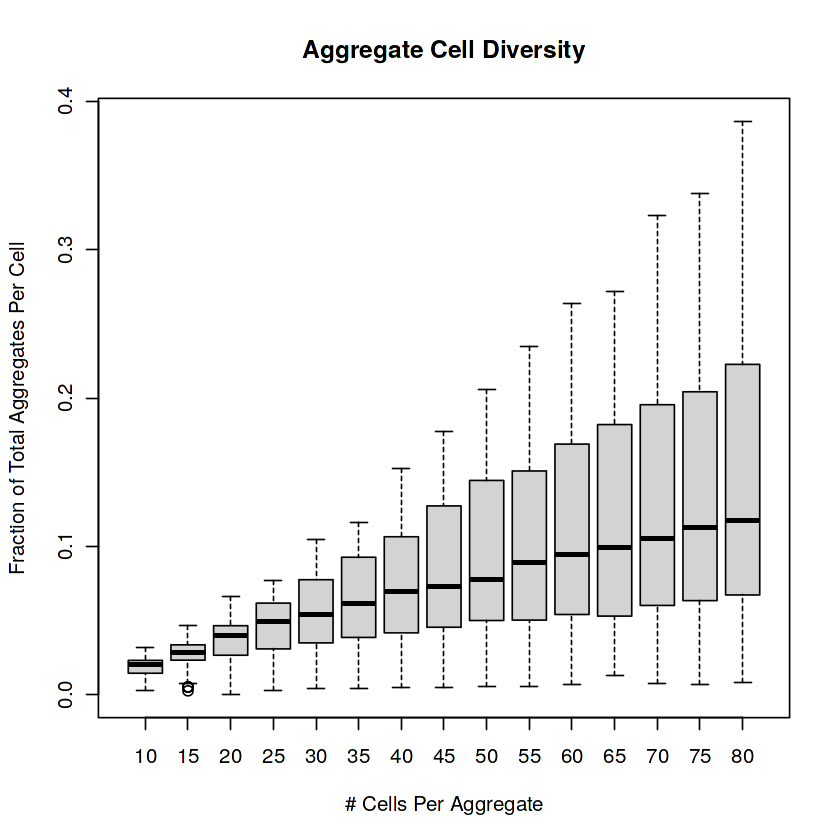

In [56]:
young_klist <- k_param_vis(young_atac_cds, reducedDims(young_atac_cds)$UMAP)

Overlap QC metrics:
Cells per bin: 10
Maximum shared cells bin-bin: 8
Mean shared cells bin-bin: 0.207307652155757
Median shared cells bin-bin: 0

Overlap QC metrics:
Cells per bin: 15
Maximum shared cells bin-bin: 13
Mean shared cells bin-bin: 0.495201252648061
Median shared cells bin-bin: 0

Overlap QC metrics:
Cells per bin: 20
Maximum shared cells bin-bin: 17
Mean shared cells bin-bin: 0.902846362980636
Median shared cells bin-bin: 0

Overlap QC metrics:
Cells per bin: 25
Maximum shared cells bin-bin: 22
Mean shared cells bin-bin: 1.47251493032515
Median shared cells bin-bin: 0

Overlap QC metrics:
Cells per bin: 30
Maximum shared cells bin-bin: 26
Mean shared cells bin-bin: 2.12732548216419
Median shared cells bin-bin: 0

Overlap QC metrics:
Cells per bin: 35
Maximum shared cells bin-bin: 31
Mean shared cells bin-bin: 3.00688175225692
Median shared cells bin-bin: 0

Overlap QC metrics:
Cells per bin: 40
Maximum shared cells bin-bin: 35
Mean shared cells bin-bin: 3.93334412780656
M

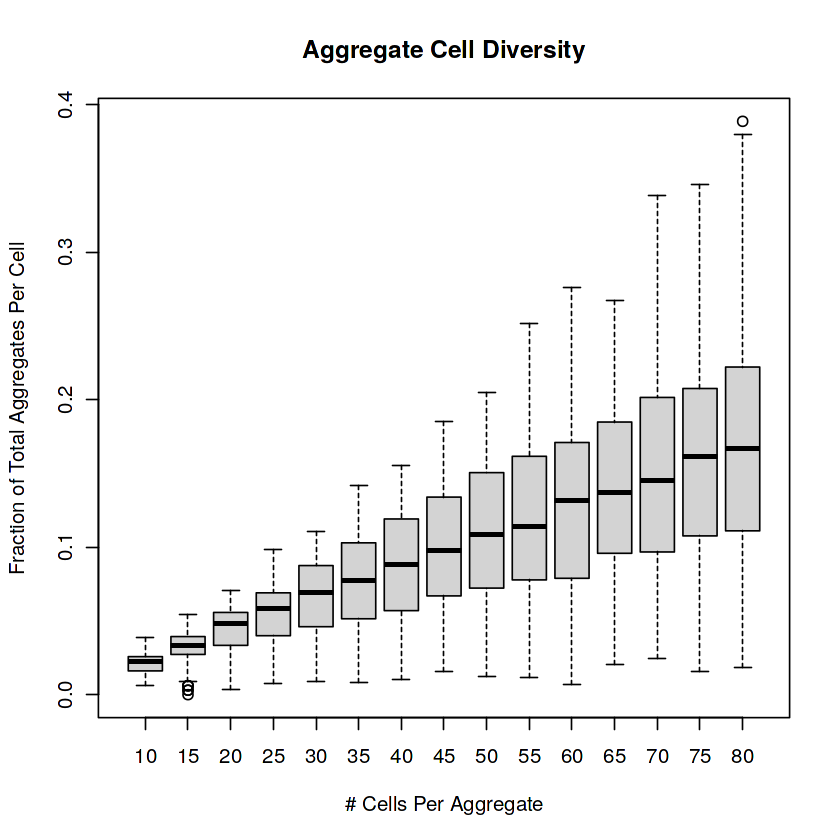

In [57]:
aged_klist <- k_param_vis(aged_atac_cds, reducedDims(aged_atac_cds)$UMAP)

Overlap QC metrics:
Cells per bin: 10
Maximum shared cells bin-bin: 8
Mean shared cells bin-bin: 0.0920383909148607
Median shared cells bin-bin: 0

Overlap QC metrics:
Cells per bin: 15
Maximum shared cells bin-bin: 13
Mean shared cells bin-bin: 0.221166063337569
Median shared cells bin-bin: 0

Overlap QC metrics:
Cells per bin: 20
Maximum shared cells bin-bin: 17
Mean shared cells bin-bin: 0.401812968273055
Median shared cells bin-bin: 0

Overlap QC metrics:
Cells per bin: 25
Maximum shared cells bin-bin: 22
Mean shared cells bin-bin: 0.641045533527108
Median shared cells bin-bin: 0

Overlap QC metrics:
Cells per bin: 30
Maximum shared cells bin-bin: 26
Mean shared cells bin-bin: 0.932714405989032
Median shared cells bin-bin: 0

Overlap QC metrics:
Cells per bin: 35
Maximum shared cells bin-bin: 31
Mean shared cells bin-bin: 1.27552508003487
Median shared cells bin-bin: 0

Overlap QC metrics:
Cells per bin: 40
Maximum shared cells bin-bin: 35
Mean shared cells bin-bin: 1.6843007213051

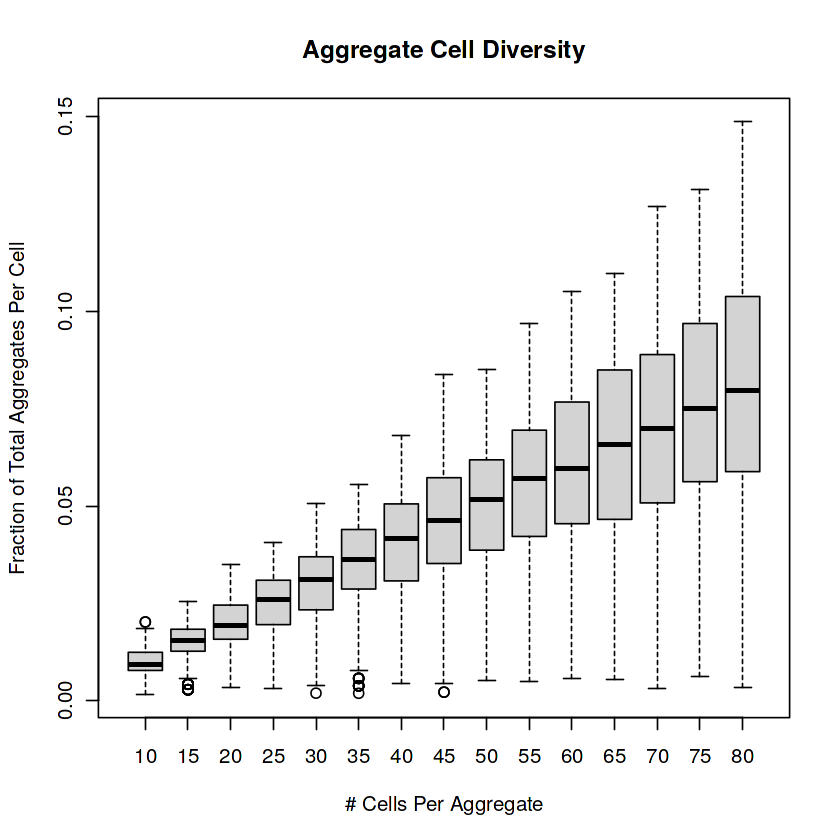

In [58]:
all_klist <- k_param_vis(MuSC_atac_cds, reducedDims(MuSC_atac_cds)$UMAP)

### Save aggregate fraction plots

In [61]:
klist_list <- list(young_klist = young_klist, aged_klist = aged_klist, all_klist = all_klist)

In [77]:
dir.create(file.path(projdir,'MuSC_subset','klist_plots'))
for(x in names(klist_list)) {
    png(file.path(projdir,'MuSC_subset','klist_plots',paste0(x,'_agg_diversity.png')), res=300, units='in', width=5, height=5)
    bxp(klist_list[[x]][[2]], boxfill = 'lightgray', notch = TRUE, 
        xlab = "# Cells Per Aggregate", ylab = "Fraction of Total Aggregates Per Cell", 
        main = paste0(x, " Aggregate Cell Diversity"))
    abline(h = 0.1, col = 'red')
    dev.off()
}

Warning message in dir.create(file.path(projdir, "MuSC_subset", "klist_plots")):
"'/nas/homes/benyang/HiC/13_MultiOme/ArchR_analysis/MuSC_subset/klist_plots' already exists"


In [59]:
saveRDS(klist_list, file.path(projdir, 'MuSC_subset', 'MuSC_klist_params.RDS'))

### Avg # peaks per aggregate

In [80]:
for(x in names(klist_list)) {
    png(file.path(projdir,'MuSC_subset','klist_plots',paste0(x,'_num_peaks.png')), res=300, units='in', width=5, height=5)
    boxplot(lapply(klist_list[[x]][[1]], function(x) colData(x[[1]])$num_genes_expressed), 
        names = seq(10,80,5), xlab = "Cells Per Aggregate", ylab = "# Covered Peaks Per Aggregate", main=paste0(x, " Num Peaks"))
    dev.off()
}

## Make Cicero objects

In [83]:
young_atac_cds.cicero <- make_cicero_cds(young_atac_cds, reduced_coordinates = reducedDims(young_atac_cds)$UMAP, k = 40)
aged_atac_cds.cicero <- make_cicero_cds(aged_atac_cds, reduced_coordinates = reducedDims(aged_atac_cds)$UMAP, k = 40)
MuSC_atac_cds.cicero <- make_cicero_cds(MuSC_atac_cds, reduced_coordinates = reducedDims(MuSC_atac_cds)$UMAP, k = 50)

Overlap QC metrics:
Cells per bin: 40
Maximum shared cells bin-bin: 35
Mean shared cells bin-bin: 3.5568356374808
Median shared cells bin-bin: 0

Overlap QC metrics:
Cells per bin: 40
Maximum shared cells bin-bin: 35
Mean shared cells bin-bin: 3.96307435254804
Median shared cells bin-bin: 0

Overlap QC metrics:
Cells per bin: 50
Maximum shared cells bin-bin: 44
Mean shared cells bin-bin: 2.66634699912091
Median shared cells bin-bin: 0



In [84]:
dir.create(file.path(projdir, 'MuSC_subset', 'Cicero_objects'))
saveRDS(young_atac_cds.cicero, file.path(projdir, 'MuSC_subset', 'Cicero_objects', "young_MuSC_cicero.RDS"))
saveRDS(aged_atac_cds.cicero, file.path(projdir, 'MuSC_subset', 'Cicero_objects', "aged_MuSC_cicero.RDS"))
saveRDS(MuSC_atac_cds.cicero, file.path(projdir, 'MuSC_subset', 'Cicero_objects', "all_MuSC_cicero.RDS"))